In [13]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm
from scipy.optimize import curve_fit

## I. Generate an n-dimensional random vector $𝒗 = [𝑣_1, 𝑣_2, ... , 𝑣_n)]$ with non-negative elements. For $𝒗$, implement the following calculations and algorithms:

In [14]:
def linear(x, a, b):
    return a * x + b

def quad(x, a, b): 
    return a * x**2 + b

def cube(x, a, b):
    return a * x**3 + b

def nlogn(a, x, b):
    return a * x * np.log(x) + b

### 1. Constant

In [38]:
def constant(array):
    return len(array)

In [39]:
# run experiments
nums = np.random.randint(1, 5, 2000)
total_time = np.zeros(2000)

for i in range(5):
    times = []

    for j in range(2000):
        # start time
        start = time.time()
        
        constant(nums[:j])

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

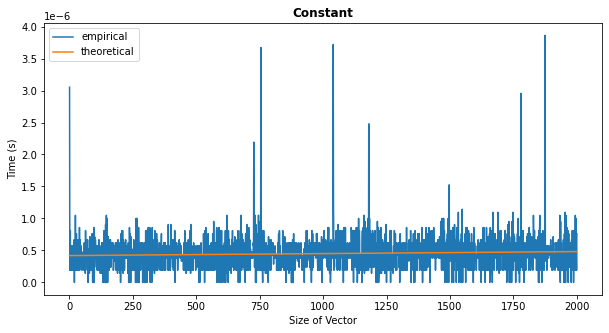

In [40]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='empirical')
props = curve_fit(linear, x, mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Constant', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 2. Sum of Elements

In [189]:
def sum_of_elements(array):
    sum = 0
    for i in array:
        sum += i
    
    return sum

In [190]:
# run experiments
nums = np.random.randint(1, 5, 2000)
total_time = np.zeros(2000)

for i in range(5):
    times = []

    for j in range(2000):
        # start time
        start = time.time()
        
        sum_of_elements(nums[:j])

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

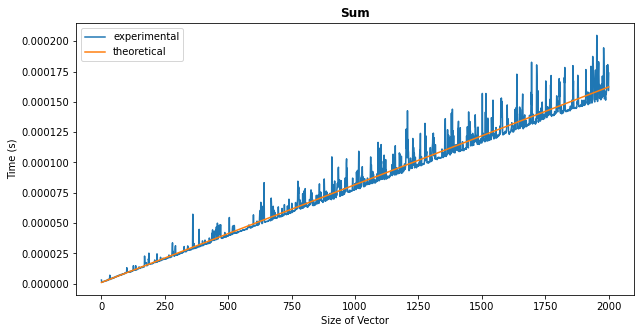

In [191]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(linear, x, mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Sum', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 3. Product of Elements

In [15]:
def product_of_elements(array):
    prod = 1
    for i in range(len(array)):
        prod *= array[i]

    return prod

In [18]:
# run experiments
nums = np.random.randint(1, 5, 2000)
total_time = np.zeros(2000)

for i in range(5):
    times = []

    for j in range(2000):
        # start time
        start = time.time()
        
        product_of_elements(nums[:j])

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

<ipython-input-15-062aedc815d3>:4: RuntimeWarning: overflow encountered in long_scalars
  prod *= array[i]


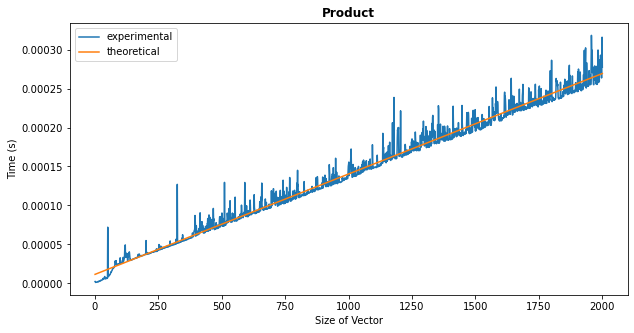

In [19]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(linear, x, mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Product', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 4a. Polynomial (Direct)

In [20]:
def poly(array, x):
    poly = 0
    
    for i in range(len(array)):
        poly += array[i] * x**i        
    
    return poly

In [21]:
# run experiments
nums = np.random.randint(1, 5, 1000)
total_time = np.zeros(1000)

for i in range(5):
    times = []

    for j in range(1000):
        # start time
        start = time.time()
        
        poly(nums[:j], x=1.5)

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

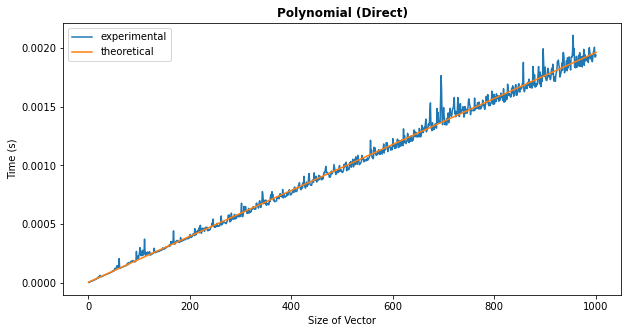

In [22]:
# plot graph
x = np.arange(1,1001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(linear, x, mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Polynomial (Direct)', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 4b. Polynomial (Horner)

In [23]:
def horner(array, x=1):
    horner = 0
        
    for i in array[-1::-1]:
        horner = horner * x + i
    
    return horner

In [27]:
# run experiments

nums = np.random.randint(1, 5, 2000)
total_time = np.zeros(2000)

for i in range(5):
    times = []

    for j in range(2000):
        # start time
        start = time.time()
        
        horner(nums[:j], x=1.5)

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

<ipython-input-23-9841570c1c6d>:5: RuntimeWarning: overflow encountered in double_scalars
  horner = horner * x + i


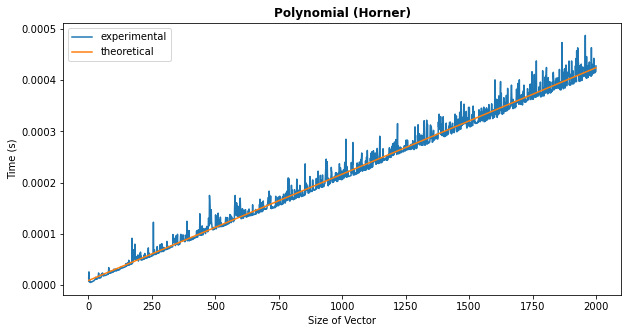

In [28]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(linear, x, mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Polynomial (Horner)', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 5. Bubble Sort

In [201]:
def bubble_sort(array):
    for _ in range(len(array)):
        for j in range(len(array)-1):
            if array[j] > array[j+1]:
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp

    return array

In [202]:
# run experiments
nums = np.random.randint(1, 5, 1000)
total_time = np.zeros(1000)

for i in tqdm(range(5)):
    times = []

    for j in tqdm(range(1000)):
        # start time
        start = time.time()
        
        bubble_sort(nums[:j])

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

100%|██████████| 5/5 [06:11<00:00, 74.39s/it]


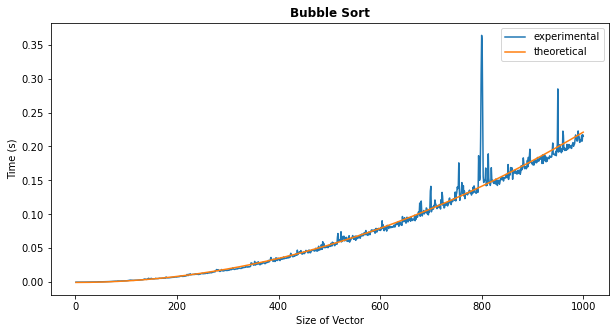

In [203]:
# plot graph
x = np.arange(1,1001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(quad, x, mean_time)
plt.plot(x, quad(x, *props[0]), label='theoretical')
plt.title('Bubble Sort', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 6. Quick Sort

In [45]:
def quick_sort(array):
    # prevent original array being poped
    c_array = array.copy()
    length = len(c_array)

    if length <= 1:
        return c_array
    else:
        # take the last element as pivot
        pivot = c_array.pop()

    greater = []
    lower = []

    for i in c_array:
        if i > pivot:
            greater.append(i)
        else:
            lower.append(i)

    return quick_sort(lower) + [pivot] + quick_sort(greater)

In [46]:
# run experiments
nums = [random.randint(0,5) for _ in range(2000)]
total_time = np.zeros(2000)

for i in tqdm(range(5)):
    times = []

    for j in tqdm(range(2000)):
        # start time
        start = time.time()
        
        quick_sort(nums[:j])

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

100%|██████████| 5/5 [01:57<00:00, 23.58s/it]


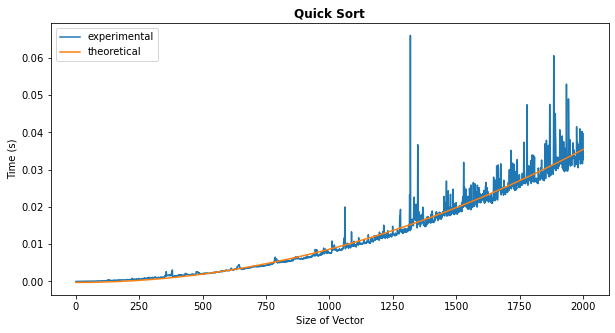

In [48]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(quad, x, mean_time)
plt.plot(x, quad(x, *props[0]), label='theoretical')
plt.title('Quick Sort', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### 7. Timsort

In [29]:
def timsort(array):
    # according to https://stackoverflow.com/questions/10948920/what-algorithm-does-pythons-sorted-use
    # since version 2.3 Python has used timsort for built-in sort() method.
    array.sort()
    return array

In [34]:
# run experiments

nums = np.random.randint(1, 10, 2000)
total_time = np.zeros(2000)

for i in tqdm(range(5)):
    times = []

    for j in tqdm(range(2000)):
        # start time
        start = time.time()
        
        timsort(nums[:j])

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

100%|██████████| 5/5 [00:00<00:00, 35.20it/s]


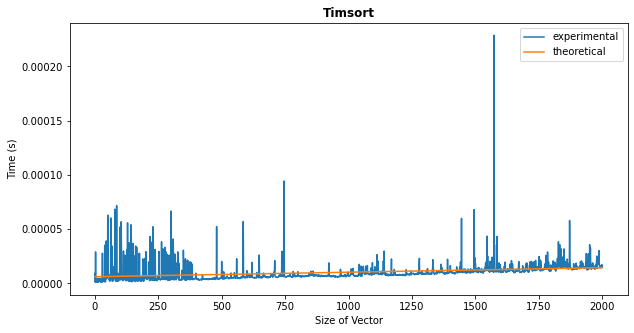

In [35]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(nlogn, x, mean_time)
plt.plot(x, nlogn(x, *props[0]), label='theoretical')
plt.title('Timsort', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

## II. Generate random matrices 𝐴 and 𝐵 of size 𝑛 × 𝑛 with non-negative elements. Find the usual matrix product for 𝐴 and 𝐵.

In [42]:
# define function

def matmul(n):
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    
    return np.dot(A, B)

In [43]:
# run experiments

total_time = np.zeros(2000)

for i in tqdm(range(5)):
    times = []

    for j in tqdm(range(2000)):
        # start time
        start = time.time()
        
        matmul(j)

        #end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time/5

100%|██████████| 5/5 [12:47<00:00, 153.58s/it]


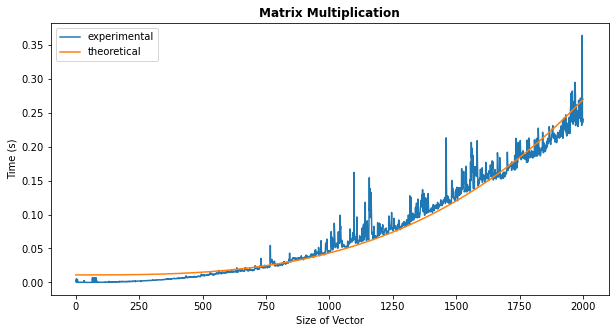

In [44]:
# plot graph

x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(cube, x, mean_time)
plt.plot(x, cube(x, *props[0]), label='theoretical')
plt.title('Matrix Multiplication', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()